## **Aim:** To understand the factors that influence restaurant ratings and create a Machine Learning Model to create a solution.

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import Libraries**

In [34]:
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

In [35]:
import warnings
warnings.filterwarnings('ignore')

## **Load Data**

In [36]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Business files/FoodieBay.csv")

In [37]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

(40130, 17)

In [38]:
data_types =['object', 'float', 'int']
df.describe(include=data_types)

url        address  \
count                                               40130          40130   
unique                                              40130           9319   
top     https://www.zomato.com/bangalore/d2v-cafe-1-ba...  Delivery Only   
freq                                                    1            124   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

                   name         phone location    rest_type      cuisines  \
count             40130         39246    40130        40130         40112   
unique             7321         12010       93            7          2213   
top     Cafe Coffee Day  080 43334321      BTM  Quick Bites  North Indian   
freq                 96           215     4422        19132          2723   
mean                NaN           NaN      NaN          NaN           NaN   
std                 NaN           NaN      NaN          NaN           NaN   
min                 NaN           NaN      NaN          NaN           NaN   
25%                 NaN           NaN      NaN          NaN           NaN   
50%                 NaN           NaN      NaN          NaN           NaN   
75%                 NaN           NaN      NaN          NaN           NaN   
max                 NaN           NaN      NaN          NaN           NaN   

       menu_item listed_in_type listed_in_city online_order book_table  \
count      40130          40130          40130        40130      40130   
unique      7324              7             30            2          2   
top           []       Delivery            BTM          Yes         No   
freq       30620          21446           2618        24559      36036   
mean         NaN            NaN            NaN          NaN        NaN   
std          NaN            NaN            NaN          NaN        NaN   
min          NaN            NaN            NaN          NaN        NaN   
25%          NaN            NaN            NaN          NaN        NaN   
50%          NaN            NaN            NaN          NaN        NaN   
75%          NaN            NaN            NaN          NaN        NaN   
max          NaN            NaN            NaN          NaN        NaN   

        ave_cost_for_two dish_liked         votes  ave_review_ranking  \
count       39890.000000      17351  40130.000000        33751.000000   
unique               NaN       3975           NaN                 NaN   
top                  NaN    Biryani           NaN                 NaN   
freq                 NaN        177           NaN                 NaN   
mean          506.697293        NaN    225.685547            3.588297   
std           324.164372        NaN    598.568781            0.913524   
min            40.000000        NaN      0.000000            1.000000   
25%           300.000000        NaN      6.000000            3.000000   
50%           400.000000        NaN     36.000000            3.727273   
75%           600.000000        NaN    174.000000            4.142857   
max          2500.000000        NaN  12121.000000            5.000000   

                rate  
count   31794.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        3.657275  
std         0.431129  
min         1.800000  
25%         3.400000  
50%         3.700000  
75%         4.000000  
max         4.900000

**Removing unnecessary features**

In [39]:
df = df.drop(["url","address","name","phone","location","menu_item","dish_liked"], axis=1)

## **Inspect missing data**

In [40]:
for i in df.iloc[:,0:]:
  if (df[i].isnull().sum() != 0):
    miss=df[i].isna().sum()
    print(i,'missing: ', miss)

cuisines missing:  18
ave_cost_for_two missing:  240
ave_review_ranking missing:  6379
rate missing:  8336


## **Remove the rows with missing values**

In [41]:
df = df.dropna(axis=0)   #since we have a large dataset we can remove the rows with missing values
df.shape

(30699, 10)

In [42]:
df["rest_type"].unique()

array(['Cafe', 'Quick Bites', 'Casual Dining', 'Takeaway, Delivery',
       'Casual Dining, Bar', 'Bakery', 'Delivery'], dtype=object)

## **Exploratory Data Analysis and Visualization**

### **Inspect target variable**

In [43]:
df.rate.describe()

count    30699.000000
mean         3.664875
std          0.432474
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

<Axes: xlabel='rate', ylabel='Count'>

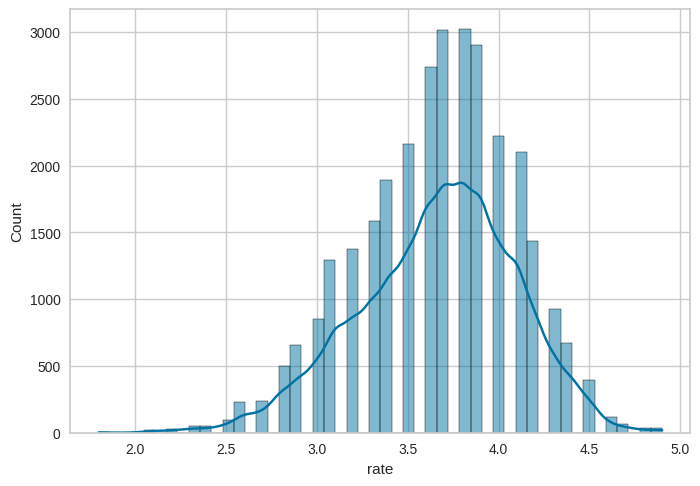

In [44]:
sns.histplot(data=df, x='rate', bins=50, kde=True)

We can see from the above figure that the distribution is normal.

<Axes: xlabel='rate'>

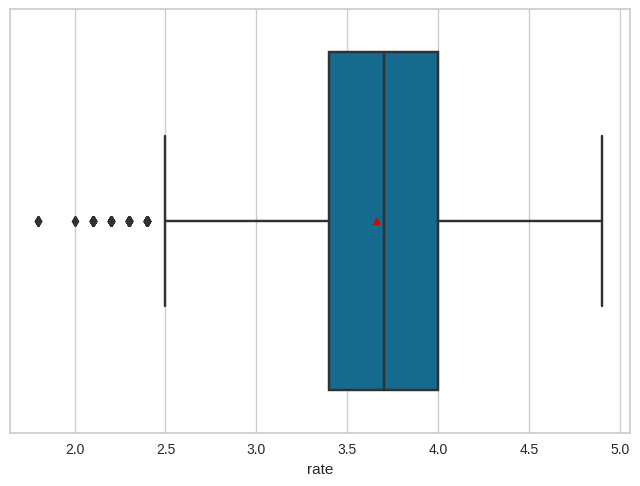

In [45]:
sns.boxplot(data=df, x='rate', showmeans=True)

### **Univariate Analysis**

In [46]:
df.describe()

ave_cost_for_two         votes  ave_review_ranking          rate
count      30699.000000  30699.000000        30699.000000  30699.000000
mean         550.862113    291.534806            3.587196      3.664875
std          340.769437    667.401398            0.856374      0.432474
min           40.000000      0.000000            1.000000      1.800000
25%          300.000000     22.000000            3.000000      3.400000
50%          500.000000     72.000000            3.714286      3.700000
75%          700.000000    254.000000            4.100000      4.000000
max         2500.000000  12121.000000            5.000000      4.900000

ave_cost_for_two :

count    30699.000000
mean       550.862113
std        340.769437
min         40.000000
25%        300.000000
50%        500.000000
75%        700.000000
max       2500.000000
Name: ave_cost_for_two, dtype: float64




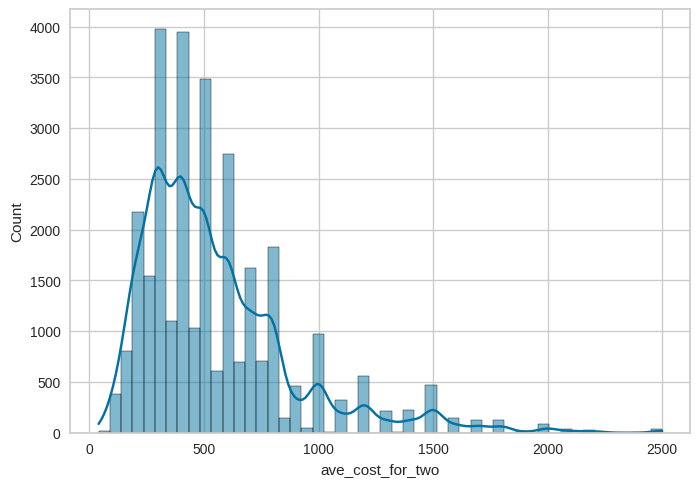

votes :

count    30699.000000
mean       291.534806
std        667.401398
min          0.000000
25%         22.000000
50%         72.000000
75%        254.000000
max      12121.000000
Name: votes, dtype: float64




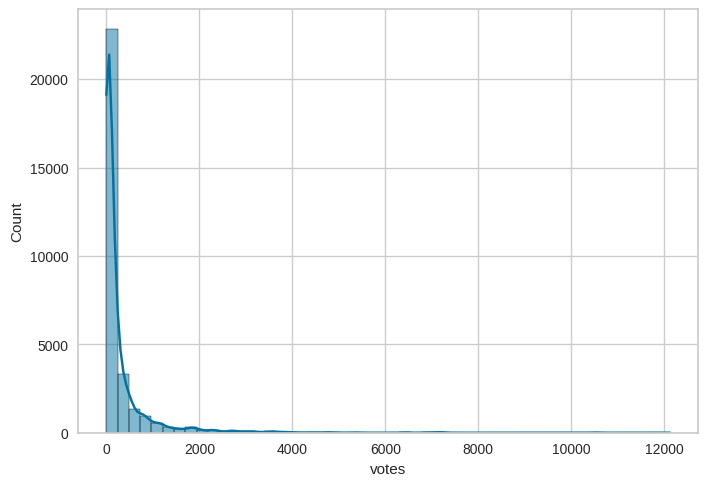

ave_review_ranking :

count    30699.000000
mean         3.587196
std          0.856374
min          1.000000
25%          3.000000
50%          3.714286
75%          4.100000
max          5.000000
Name: ave_review_ranking, dtype: float64




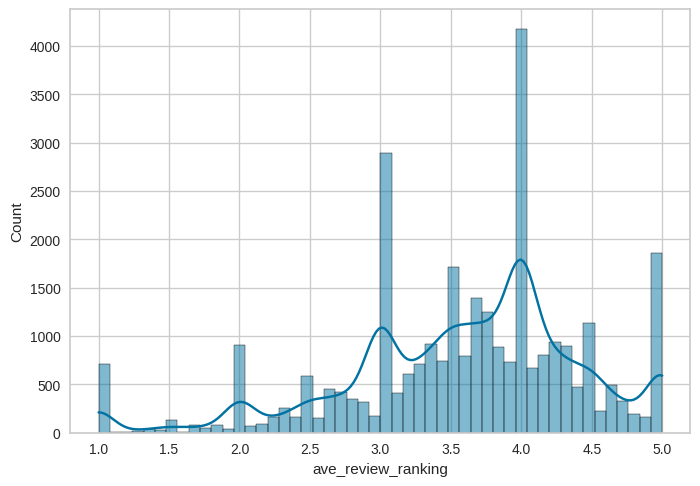

rate :

count    30699.000000
mean         3.664875
std          0.432474
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64




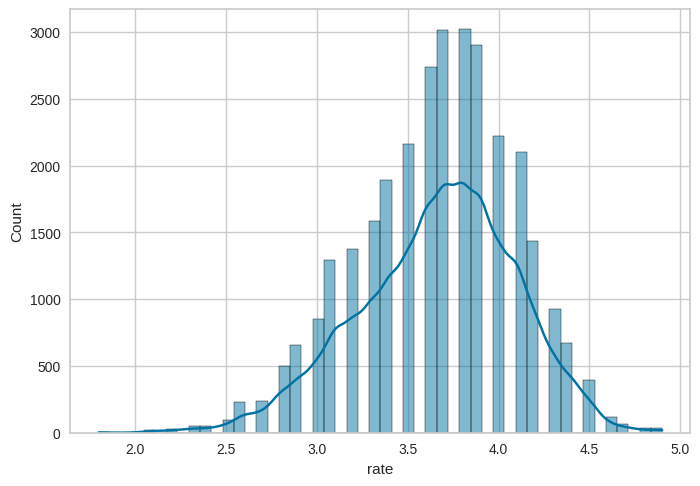

In [47]:
#creating both descriptive stats and histograms for numeric variables
num_list = ['ave_cost_for_two','votes', 'ave_review_ranking', 'rate']
for i in num_list:
   print(i, ':\n')
   print(df[i].describe())
   print('\n')
   sns.histplot(data=df, x=i, bins = 50, kde=True)
   plt.show()


 rest_type :

Quick Bites           13319
Casual Dining          9467
Cafe                   3313
Delivery               1628
Takeaway, Delivery     1236
Casual Dining, Bar     1056
Bakery                  680
Name: rest_type, dtype: int64




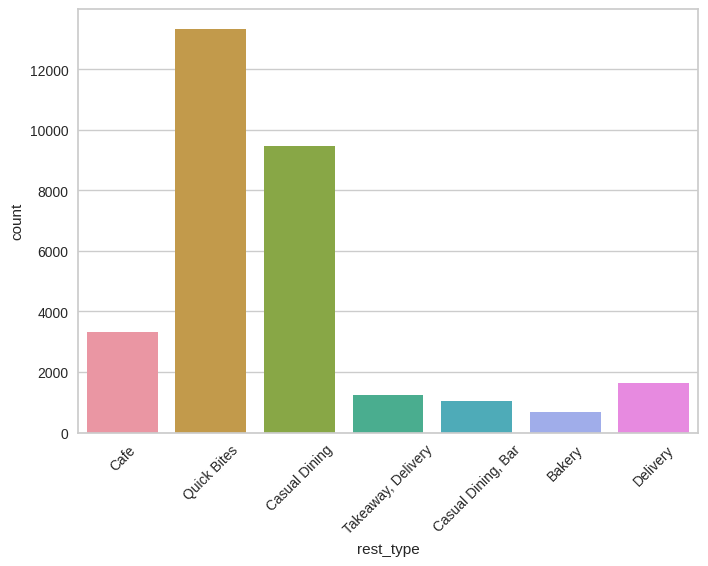


 online_order :

Yes    21557
No      9142
Name: online_order, dtype: int64




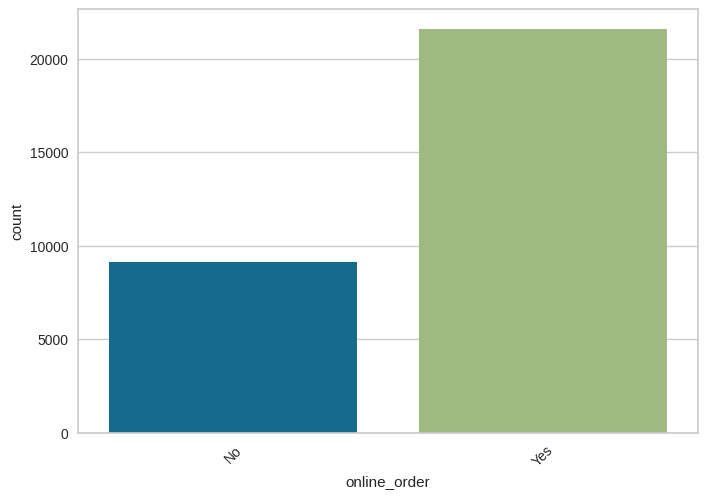


 book_table :

No     26744
Yes     3955
Name: book_table, dtype: int64




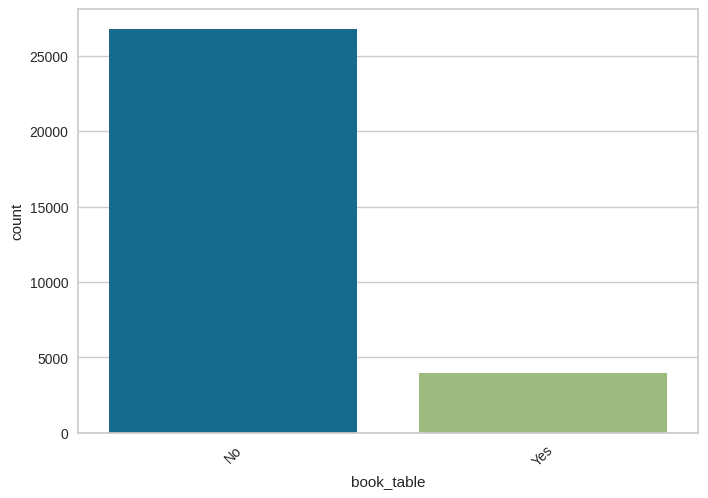


 listed_in_type :

Delivery              16423
Dine-out              11293
Cafes                  1105
Desserts                844
Buffet                  668
Pubs and bars           202
Drinks & nightlife      164
Name: listed_in_type, dtype: int64




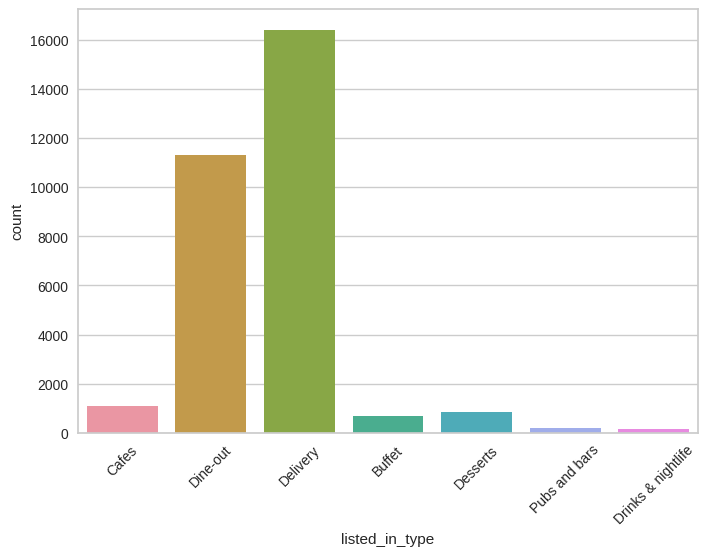

In [48]:
#Listing the categorical variables and print value_counts and countplots

cat_list = ['rest_type','online_order','book_table','listed_in_type']
for i in cat_list:
   print('\n',i, ':\n')
   print(df[i].value_counts())
   print('\n')
   sns.countplot(x=df[i])
   plt.xticks(rotation=45)
   plt.show()

### **Checking the frequency of cuisines**

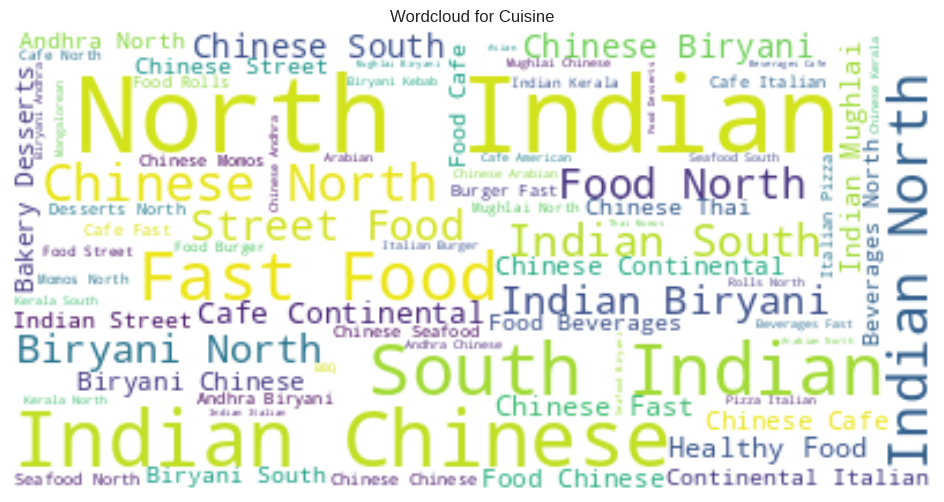

In [49]:
# Concatenate all cuisines into one text
cuisines = " ".join(cuisine for cuisine in df['cuisines'].astype(str))

# Create a wordcloud
wordcloud = WordCloud(background_color="white").generate(cuisines)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Cuisine")
plt.show()

### **Checking the area with most number of restaurants**

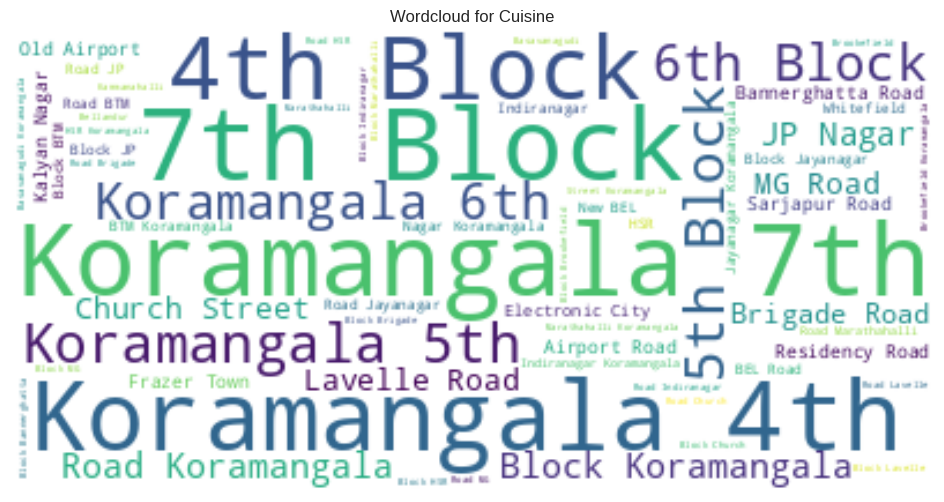

In [50]:
# Concatenate all location into one text
cities = " ".join(city for city in df['listed_in_city'].astype(str))

# Create a wordcloud
wordcloud = WordCloud(background_color="white").generate(cities)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Cuisine")
plt.show()

### **Checking the most common services provided by restaurant**

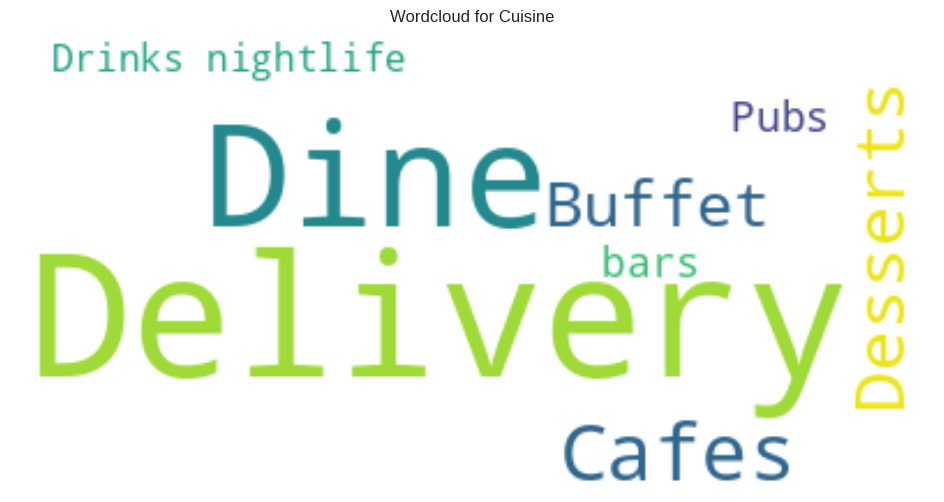

In [51]:
# Concatenate all restaurant type into one text
res_type = " ".join(t for t in df['listed_in_type'].astype(str))

# Create a wordcloud
wordcloud = WordCloud(background_color="white").generate(res_type)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Cuisine")
plt.show()

### **Checking the most common restaurant type**

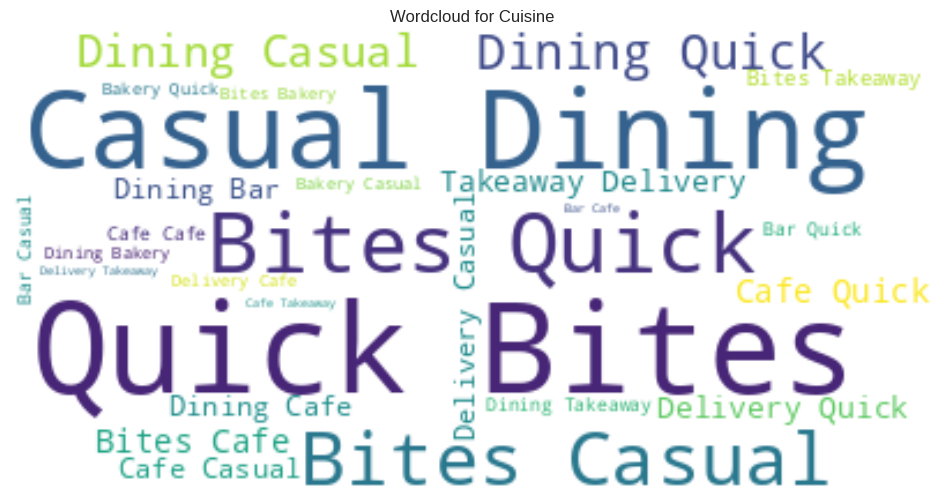

In [52]:
# Concatenate all restaurant type into one text
res_type = " ".join(t for t in df['rest_type'].astype(str))

# Create a wordcloud
wordcloud = WordCloud(background_color="white").generate(res_type)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Cuisine")
plt.show()

### **Bivariate Analysis**

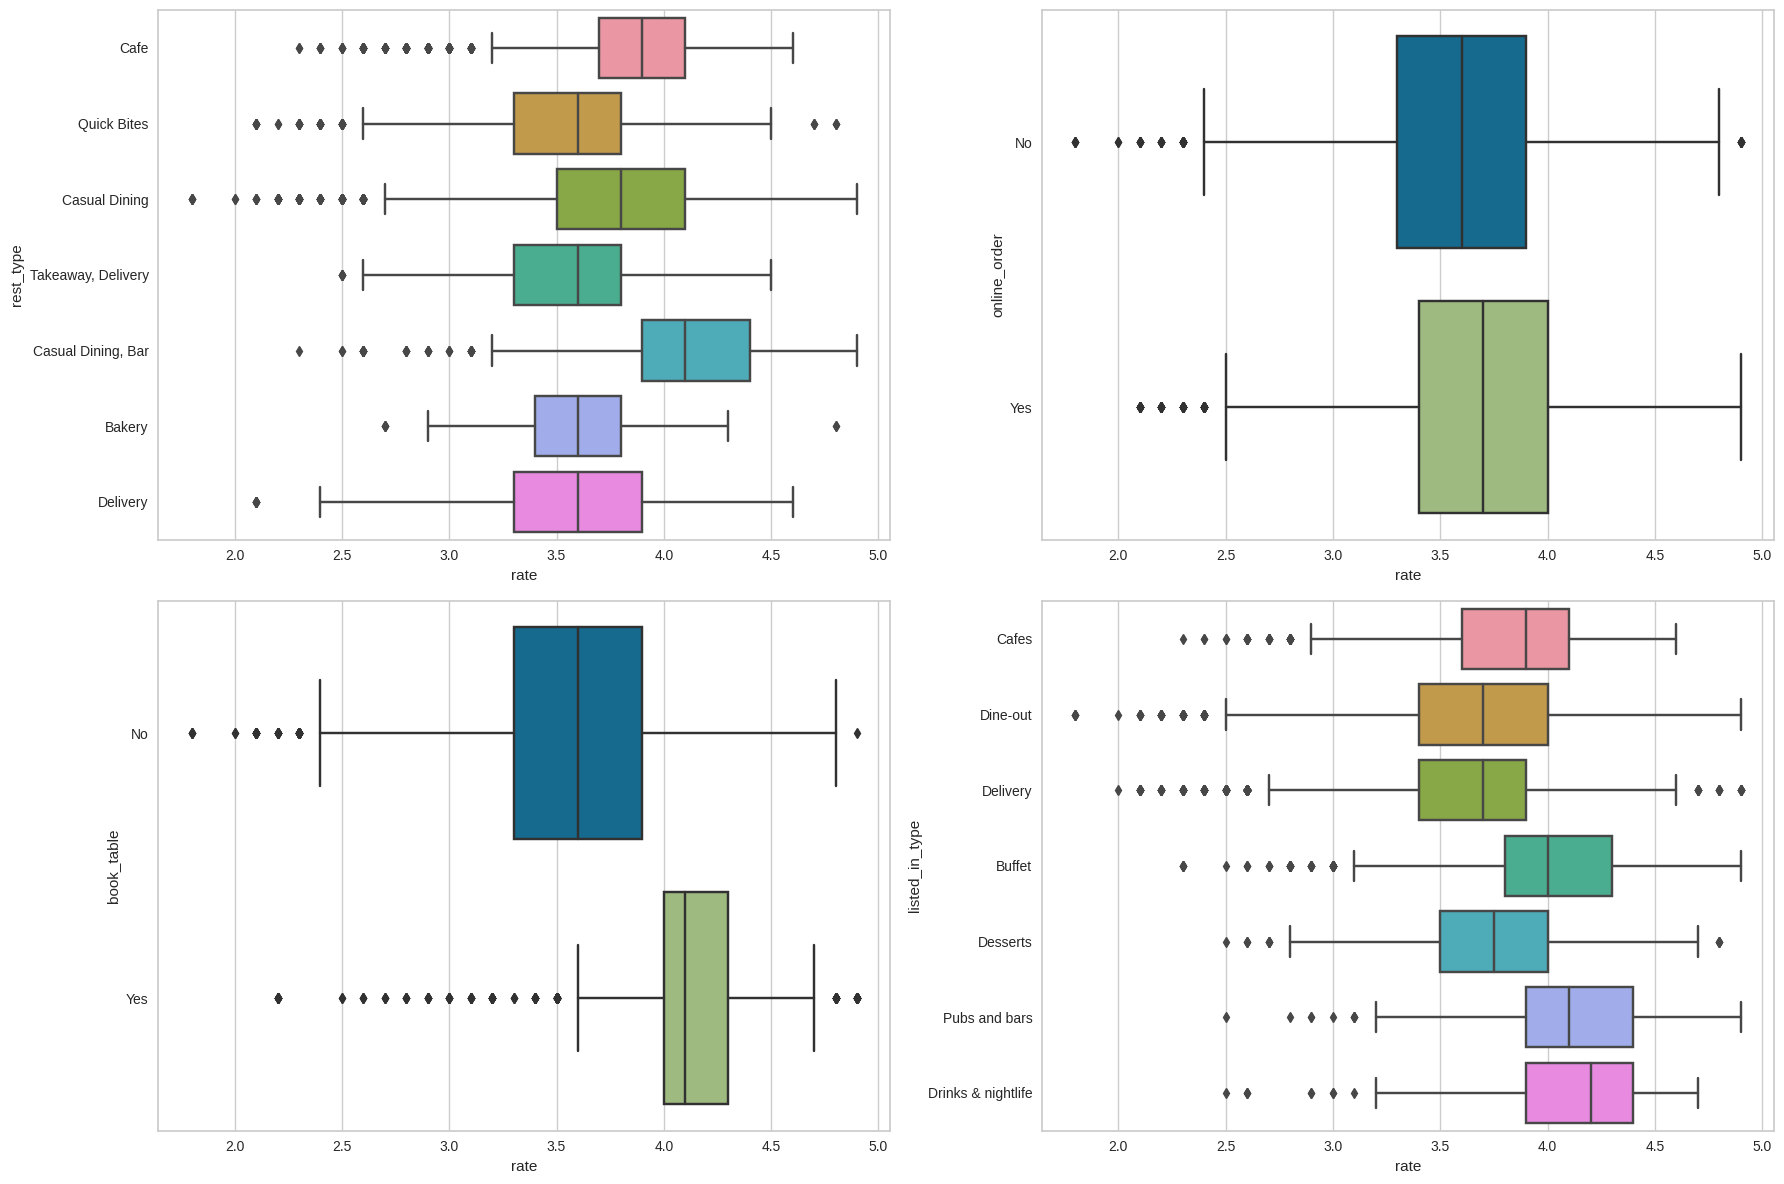

In [53]:
#Examine the distribution of the target by the categorical data

list_cat = ['rest_type','online_order','book_table','listed_in_type']

fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(18,12))
axes = ax.flatten()
for i in range(len(list_cat)):
  sns.boxplot(data=df, y=df[list_cat[i]], x="rate", ax = axes[i], orient='h')

plt.tight_layout()
plt.show()

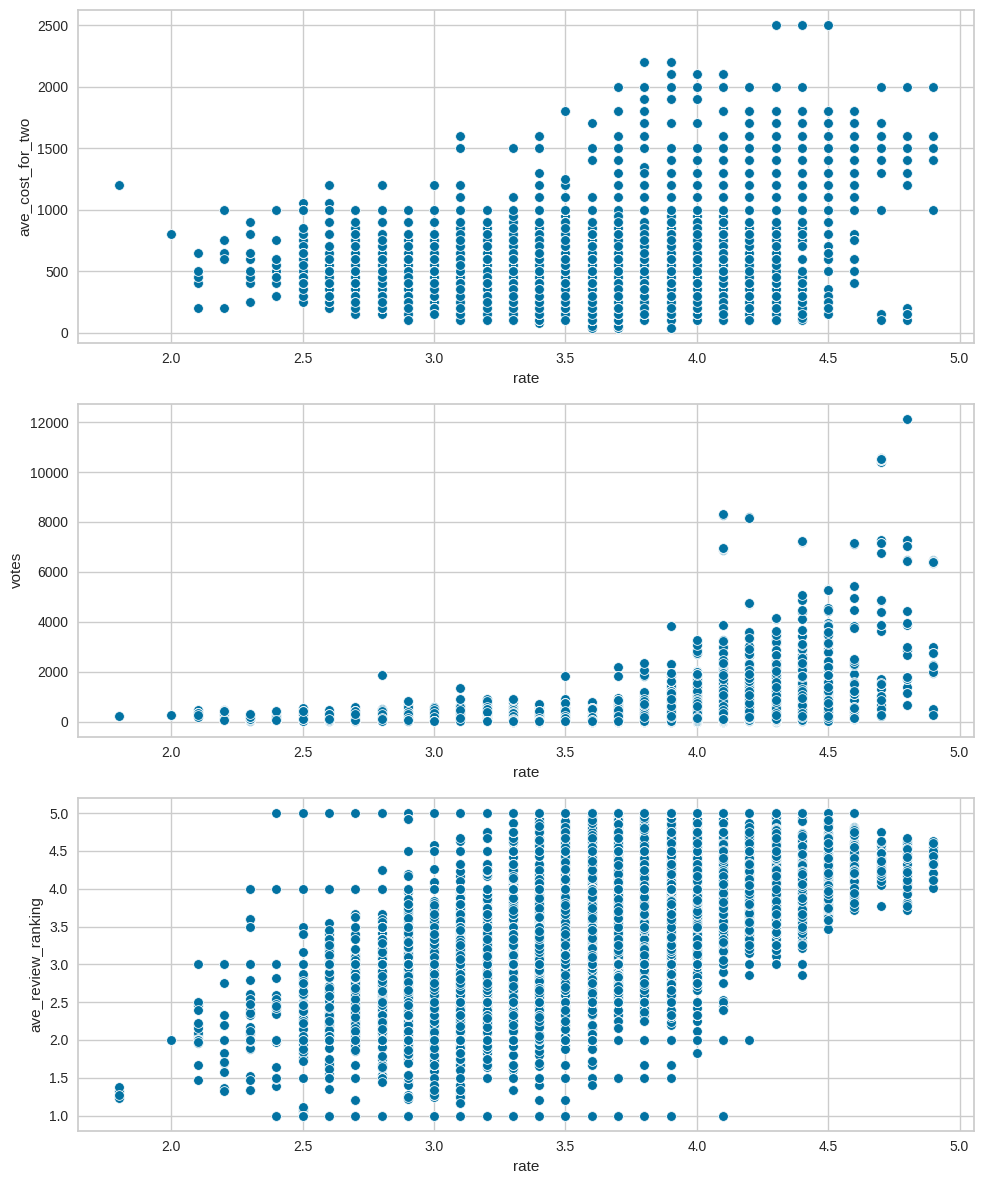

In [54]:
#Examine the distribution of the target by the numeric data

list_num = ['ave_cost_for_two','votes', 'ave_review_ranking']

fig,ax = plt.subplots(nrows=3,ncols=1, figsize=(10,12))
axes = ax.flatten()
for i in range(len(list_num)):
  sns.scatterplot(data=df, y=df[list_num[i]], x="rate", ax = axes[i])

plt.tight_layout()
plt.show()

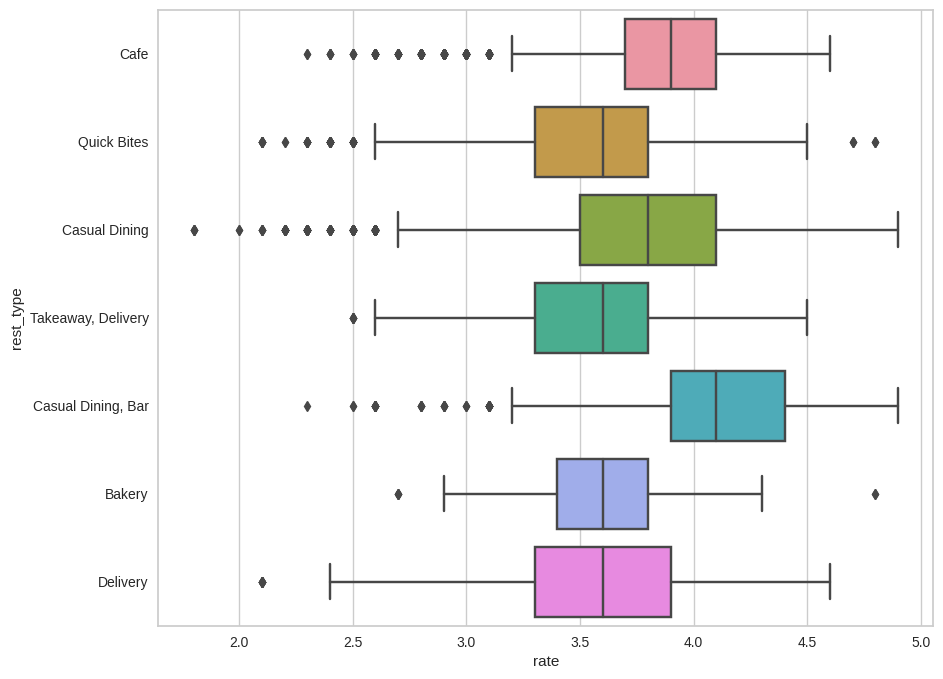

In [55]:
# Checking the influence of restaurant type on ratings
plt.figure(figsize=(10,8))
sns.boxplot(data=df, y='rest_type', x='rate')
plt.show()

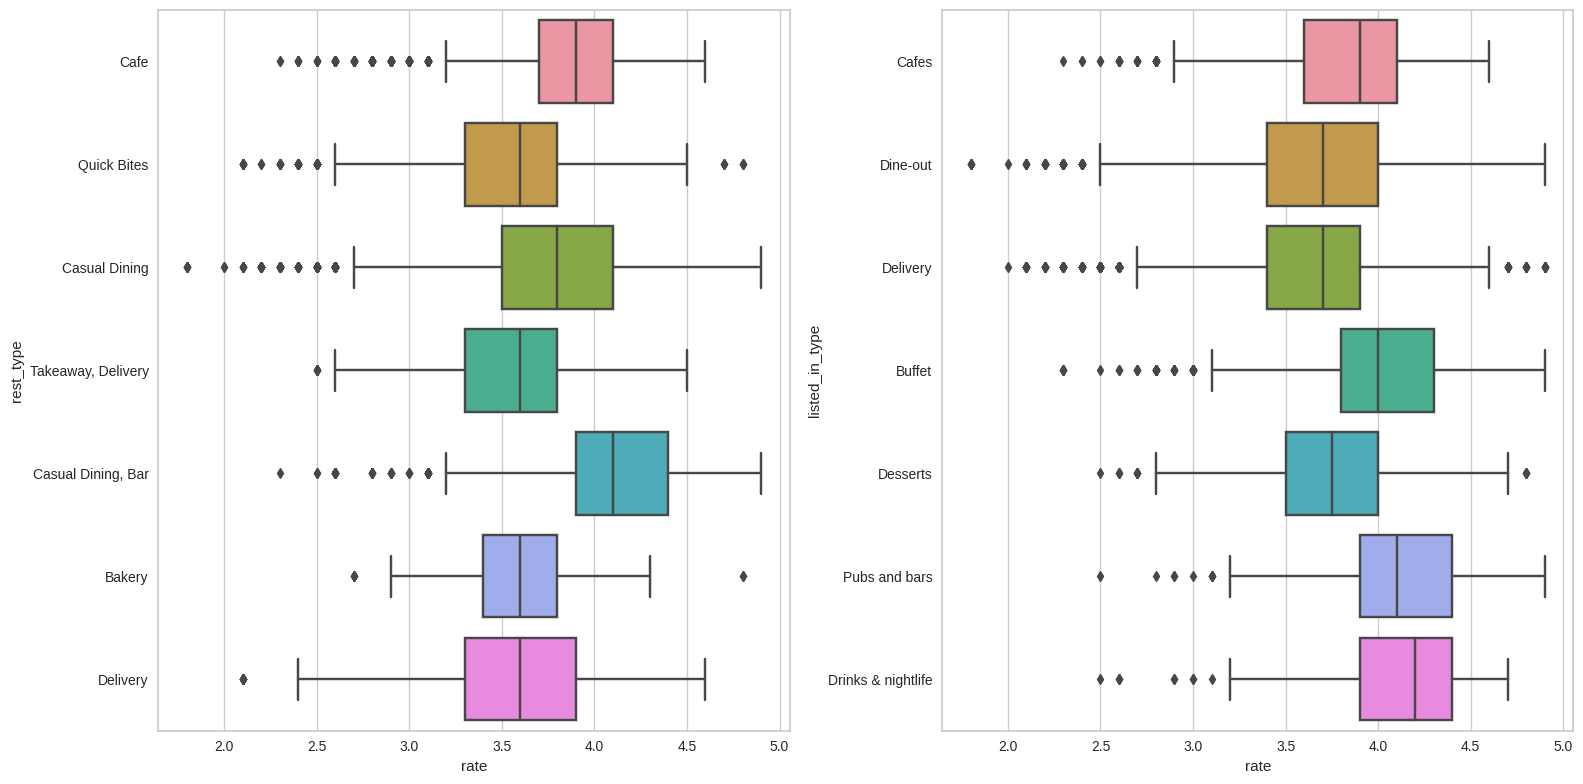

In [56]:
# Checking the influence of restaurant type and services on ratings

list_res = ['rest_type','listed_in_type']
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(16,8))
axes = ax.flatten()

for i in range(len(list_res)):
  sns.boxplot(data=df, y=df[list_res[i]], x="rate", ax = axes[i])

plt.tight_layout()
plt.show()

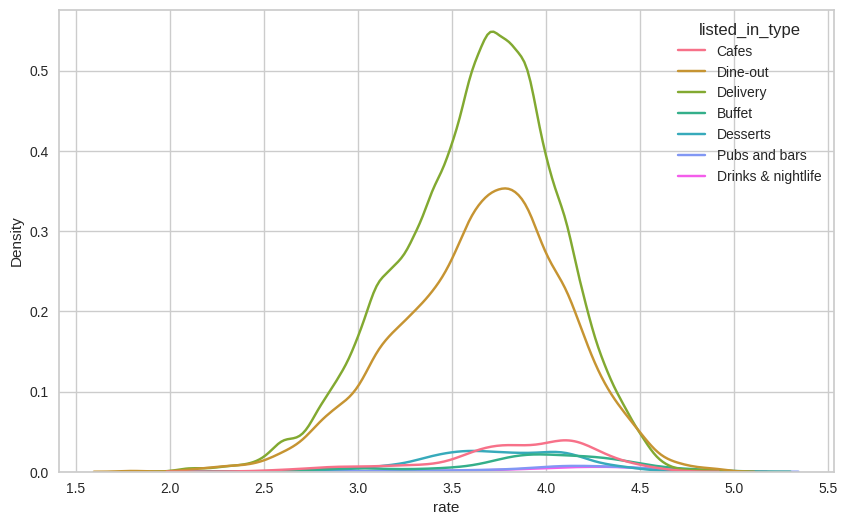

In [57]:
# Checking the influence of service type of restaurant on rate
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='rate', hue='listed_in_type')
plt.show()

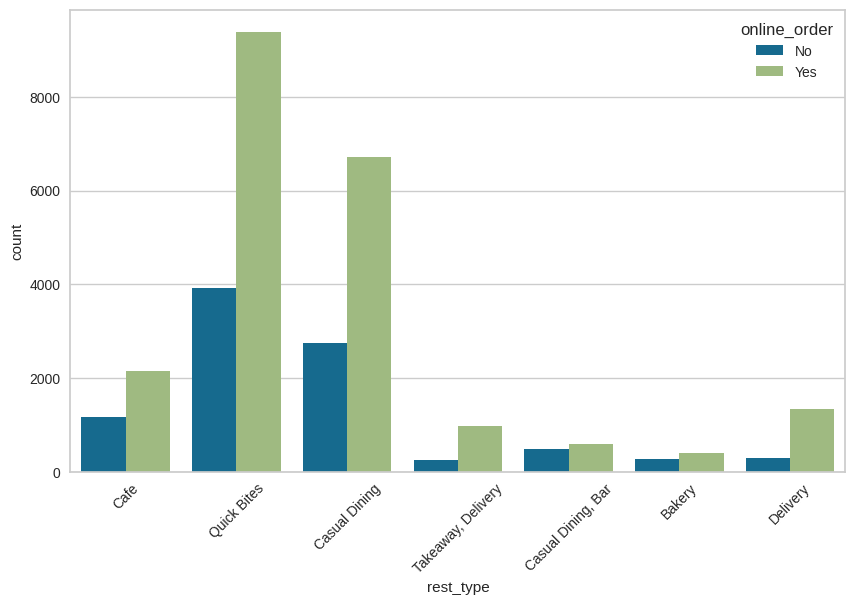

In [58]:
# Counting types of restaurants taking online orders
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'rest_type',hue='online_order')
plt.xticks(rotation=45)
plt.show()

In [59]:
count_table = pd.crosstab(df['rest_type'],df['online_order'])
print(count_table)

online_order          No   Yes
rest_type                     
Bakery               275   405
Cafe                1171  2142
Casual Dining       2740  6727
Casual Dining, Bar   477   579
Delivery             298  1330
Quick Bites         3925  9394
Takeaway, Delivery   256   980


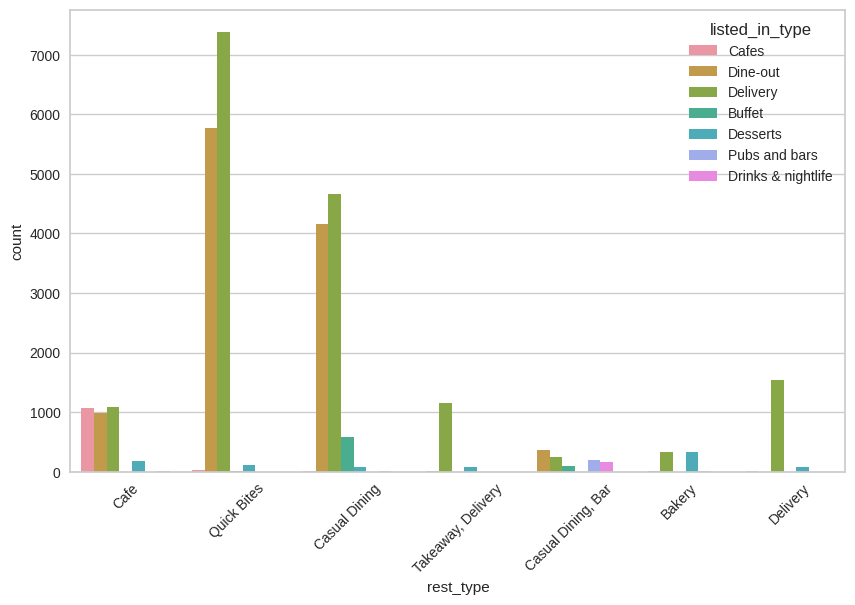

In [60]:
# Counting types of restaurants with different services
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'rest_type',hue='listed_in_type')
plt.xticks(rotation=45)
plt.show()

In [61]:
count_table = pd.crosstab(df['rest_type'],df['listed_in_type'])
print(count_table)

listed_in_type      Buffet  Cafes  Delivery  Desserts  Dine-out  \
rest_type                                                         
Bakery                   0      0       337       332         9   
Cafe                     0   1062      1093       178       976   
Casual Dining          578      6      4656        71      4150   
Casual Dining, Bar      88      0       252         0       363   
Delivery                 0      3      1545        78         1   
Quick Bites              2     34      7390       114      5779   
Takeaway, Delivery       0      0      1150        71        15   

listed_in_type      Drinks & nightlife  Pubs and bars  
rest_type                                              
Bakery                               0              2  
Cafe                                 3              1  
Casual Dining                        6              0  
Casual Dining, Bar                 155            198  
Delivery                             0              1  
Quic

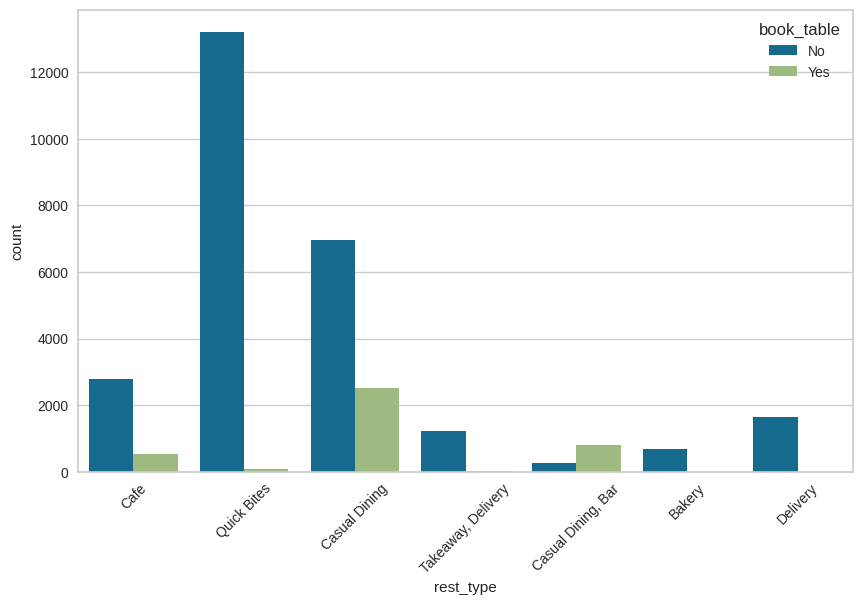

In [62]:
# Counting types of restaurants taking online orders
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'rest_type',hue='book_table')
plt.xticks(rotation=45)
plt.show()

In [63]:
count_table = pd.crosstab(df['rest_type'],df['book_table'])
print(count_table)

book_table             No   Yes
rest_type                      
Bakery                680     0
Cafe                 2770   543
Casual Dining        6952  2515
Casual Dining, Bar    255   801
Delivery             1628     0
Quick Bites         13227    92
Takeaway, Delivery   1232     4


### **Multivariate Analysis**

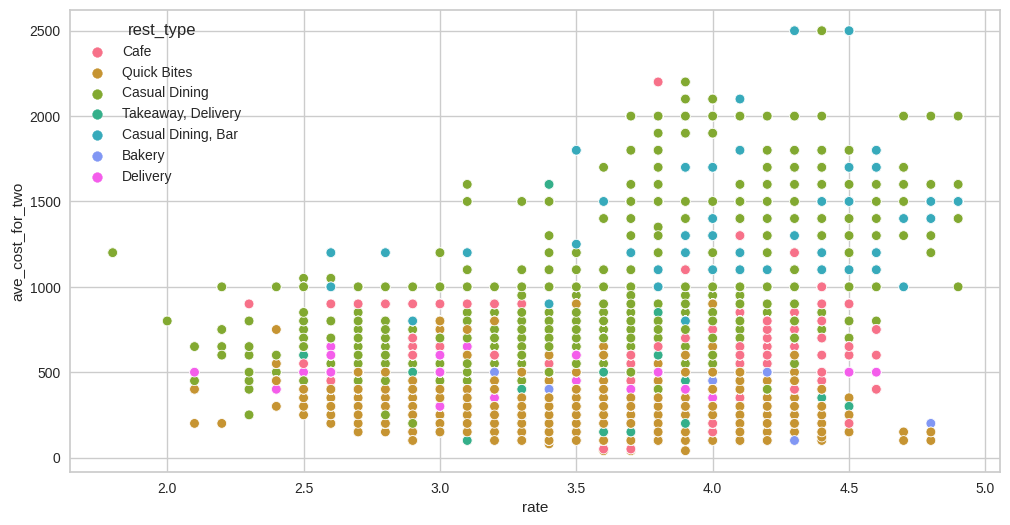

In [64]:
# Checking how rate and average cost for two vary among the restaurant types
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, y='ave_cost_for_two', x='rate', hue='rest_type')
plt.show()

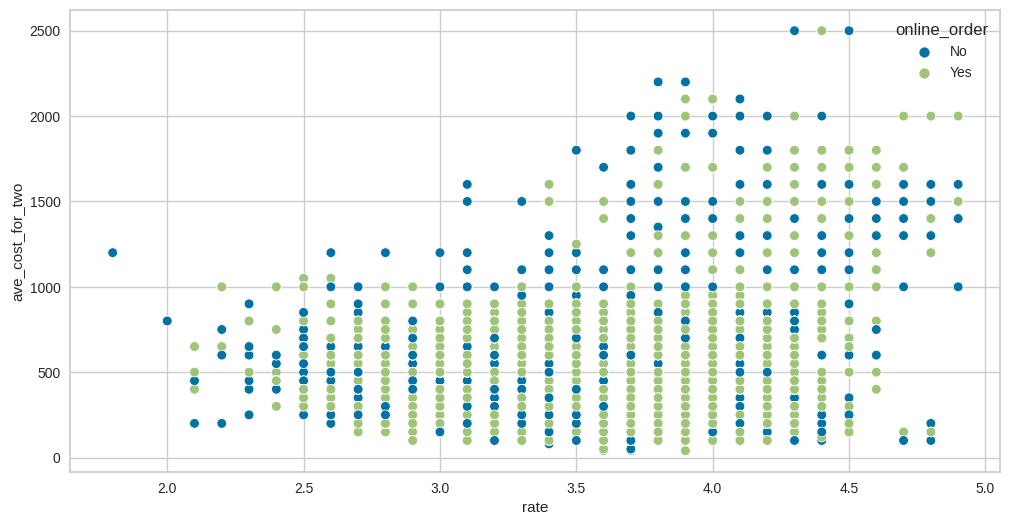

In [65]:
# Checking how rate and average cost for two vary among the restaurant orders
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, y='ave_cost_for_two', x='rate', hue='online_order')
plt.show()

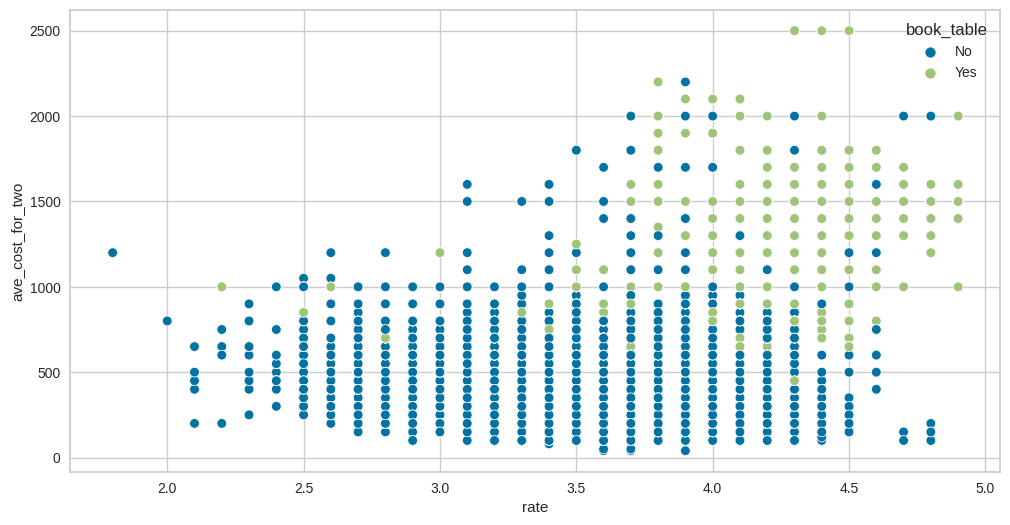

In [66]:
# Checking how rate and average cost for two vary among booking
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, y='ave_cost_for_two', x='rate', hue='book_table')
plt.show()

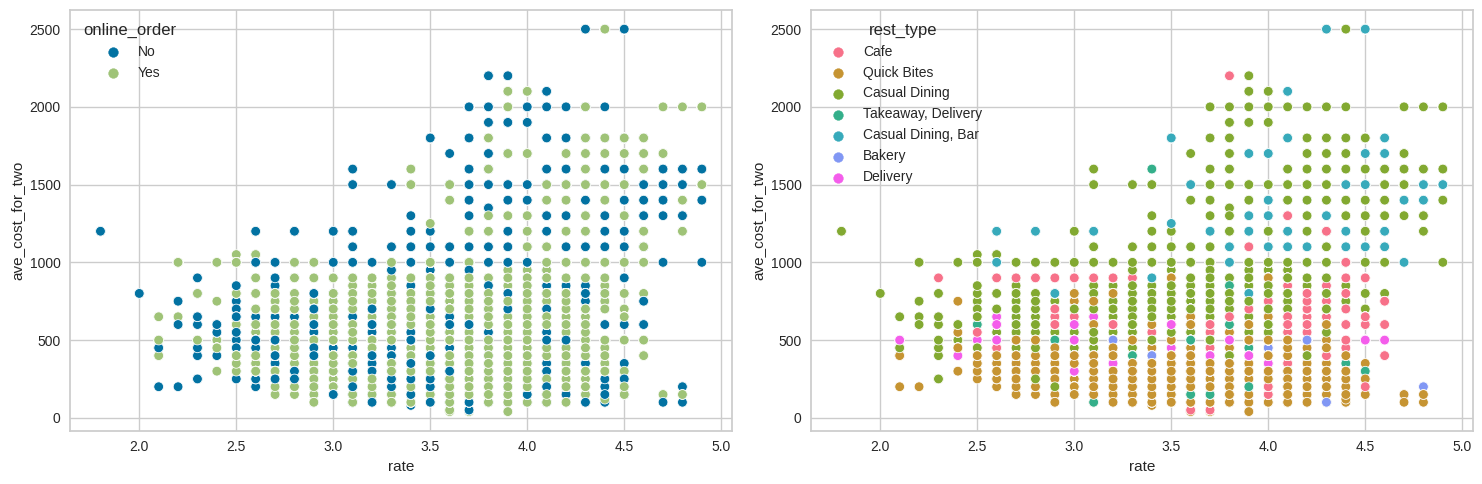

In [67]:
list_res = ['online_order','rest_type']
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
ax = ax.flatten()
for i in range(len(list_res)):
  sns.scatterplot(data=df, y='ave_cost_for_two', x='rate', hue=list_res[i], ax=ax[i])

plt.tight_layout()
plt.show()

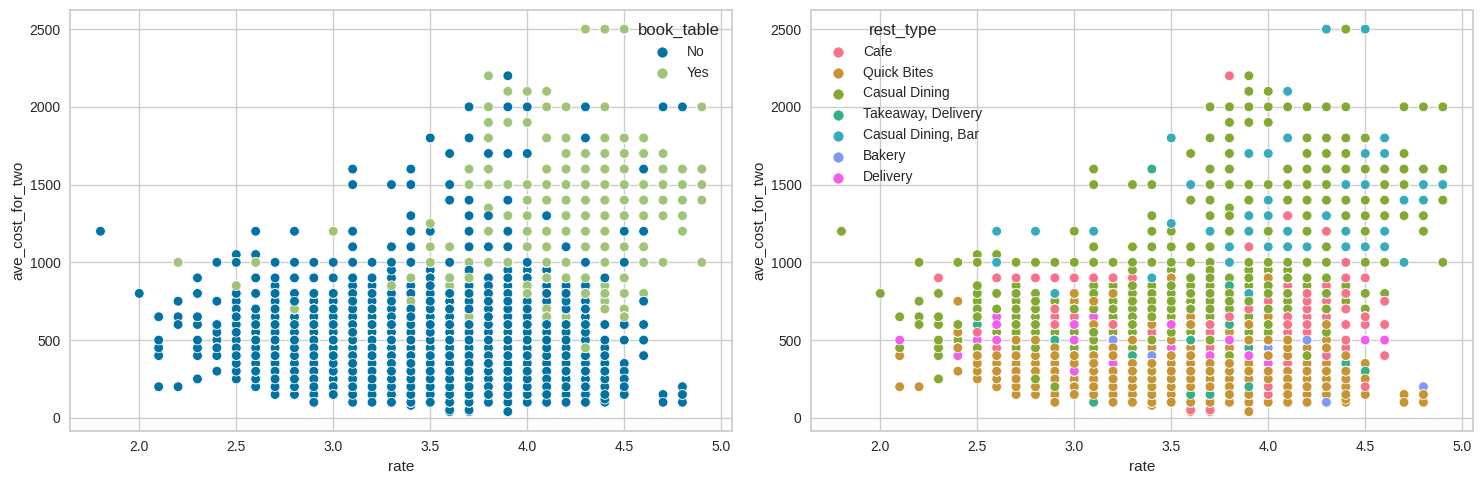

In [68]:
list_res = ['book_table','rest_type']
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
ax = ax.flatten()
for i in range(len(list_res)):
  sns.scatterplot(data=df, y='ave_cost_for_two', x='rate', hue=list_res[i], ax=ax[i])

plt.tight_layout()
plt.show()

## **Heatmap**

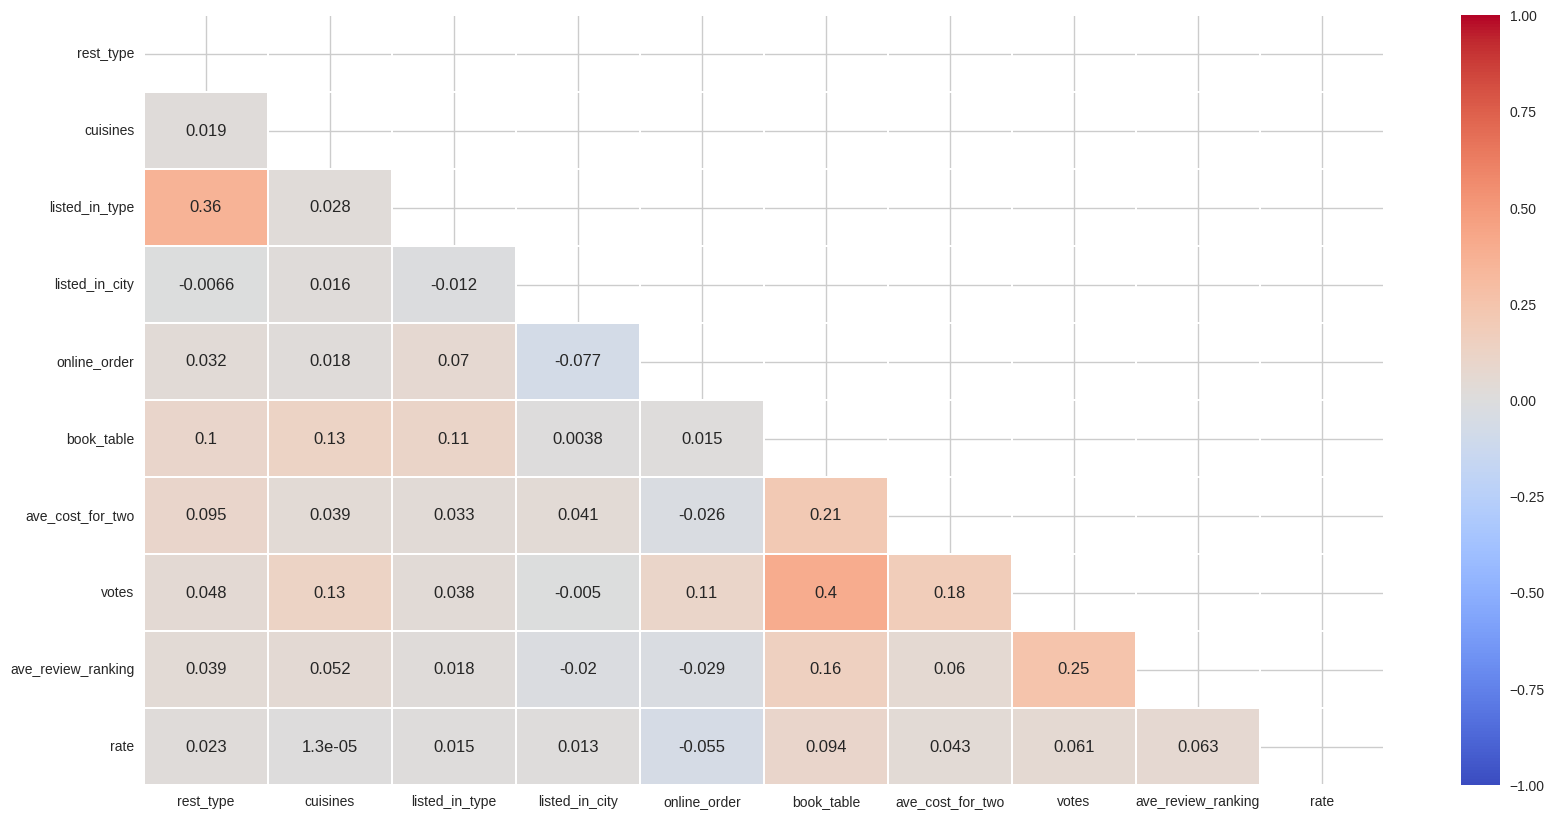

In [69]:
plt.figure(figsize=(20, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

### **Clustermap**

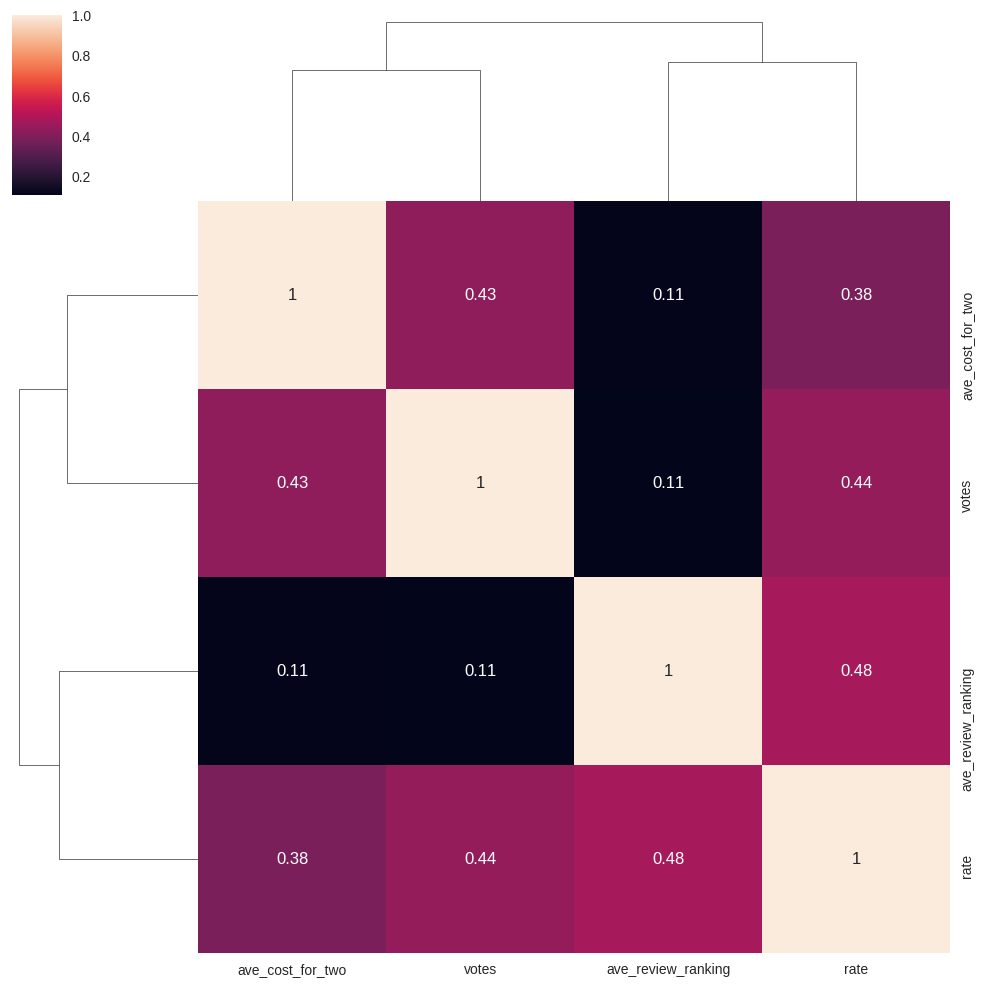

In [70]:
sns.clustermap(df.corr(), annot=True)

### **Data preparation**
* Data conversion
* Feature selection: X
* Target specification: y
* Scale data
* Data spliting: X_train, X_test, y_train, y_test

In [71]:
df.head()

rest_type                               cuisines listed_in_type  \
0           Cafe                                   Cafe          Cafes   
1    Quick Bites         Burger, Continental, Fast Food       Dine-out   
2    Quick Bites             South Indian, Healthy Food       Delivery   
3  Casual Dining  Chinese, North Indian, Biryani, Kebab       Delivery   
4           Cafe                              Cafe, Tea       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  votes  \
0               JP Nagar           No         No             700.0     13   
1  Koramangala 5th Block          Yes         No             400.0     28   
2              Jayanagar          Yes         No             200.0     18   
3           Brigade Road          Yes        Yes            1200.0    550   
4           New BEL Road          Yes         No             250.0     67   

   ave_review_ranking  rate  
0                4.75   3.6  
1                4.50   3.8  
2                4.00   3.9  
3                4.80   4.3  
4                3.00   3.7

In [72]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(df, columns=['rest_type', 'listed_in_type','online_order','book_table'], drop_first=True)

In [73]:
records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30699 entries, 0 to 40129
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cuisines                           30699 non-null  object 
 1   listed_in_city                     30699 non-null  object 
 2   ave_cost_for_two                   30699 non-null  float64
 3   votes                              30699 non-null  int64  
 4   ave_review_ranking                 30699 non-null  float64
 5   rate                               30699 non-null  float64
 6   rest_type_Cafe                     30699 non-null  uint8  
 7   rest_type_Casual Dining            30699 non-null  uint8  
 8   rest_type_Casual Dining, Bar       30699 non-null  uint8  
 9   rest_type_Delivery                 30699 non-null  uint8  
 10  rest_type_Quick Bites              30699 non-null  uint8  
 11  rest_type_Takeaway, Delivery       30699 non-null  uin

### **Feature selection**

In [74]:
X = records.drop(['cuisines','listed_in_city','rate'], axis=1)
y = records['rate']

### **Splitting data**

In [75]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [76]:
# Features to scale
features_to_scale = ['ave_cost_for_two', 'votes', 'ave_review_ranking' ]

# Features to keep
features_to_keep = ['rest_type_Cafe','rest_type_Casual Dining','rest_type_Casual Dining, Bar',	'rest_type_Delivery',	'rest_type_Quick Bites',
                    'rest_type_Takeaway, Delivery','listed_in_type_Cafes','listed_in_type_Delivery','listed_in_type_Desserts','listed_in_type_Dine-out',
                    'listed_in_type_Drinks & nightlife','listed_in_type_Pubs and bars','online_order_Yes','book_table_Yes']

In [77]:
# Normalize the features using StandardScaler
scaler = StandardScaler()

# Fit and transform the features to scale on the training data
X_train_scaled_values = scaler.fit_transform(X_train[features_to_scale])
# Transform the features to scale on the test data
X_test_scaled_values = scaler.transform(X_test[features_to_scale])

# Create DataFrames from the scaled values
X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=features_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_train_scaled = pd.concat([X_train_scaled, X_train[features_to_keep].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[features_to_keep].reset_index(drop=True)], axis=1)

<a id = "cell_modeling"></a>
## 3. Machine learning model development

### **KNN Model**

In [78]:
# Creating a KNN regressor object
k=3
knn = KNeighborsRegressor(k)

# Fitting data
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [79]:
# Predicting data
y_pred = knn.predict(X_test_scaled)

### **Inspecting prediction**

In [80]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspection.head(10)

Actual  Predicted
11210     3.0   3.733333
2246      2.9   3.133333
29349     3.6   3.466667
31952     3.7   3.666667
34301     2.9   3.800000
27279     3.4   3.366667
13821     3.9   4.233333
12768     3.8   3.800000
39169     4.0   4.000000
28574     3.3   3.266667

<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                      

In [81]:
# Calculating performance metrics for the first model
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_1 = r2_score(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)

# Printing performance metrics for the first model
print("Root Mean Squared Error: {:.3f}".format(rmse_1))
print("R Squared: {:.3f}".format(r2_1))
print("Absolute Squared Error: {:.3f}".format(mae_1))

Root Mean Squared Error: 0.243
R Squared: 0.686
Absolute Squared Error: 0.151


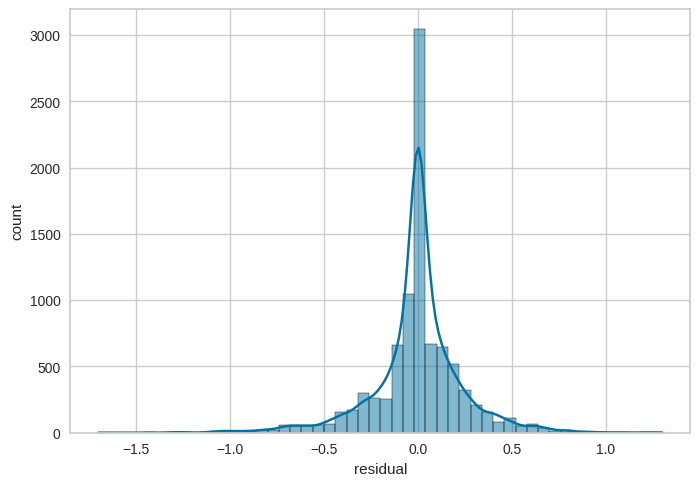

In [82]:
# Plotting residuals, i.e. the differences between the actual and predicted values.
sns.histplot(x=y_test-y_pred, bins=50, kde=True)
plt.xlabel('residual')
plt.ylabel('count')
plt.show()

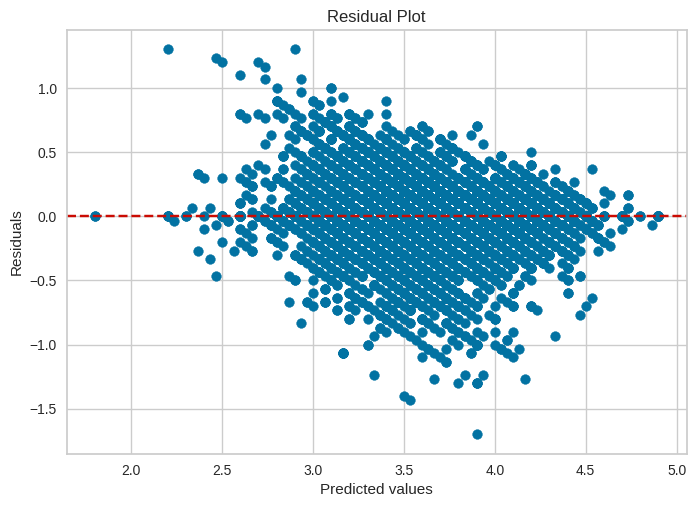

In [83]:
# Creating a scatter plot of residuals against predicted values
plt.scatter(y_pred, y_test-y_pred)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

### **Optimising K based on RMSE**

In [84]:
# list of k values to test
k_values = list(range(1, 31))

# Train and evaluate KNN classifiers with different k values

best_k=3
best_rmse=0.253
error_rates=[]
for k in k_values:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_scaled, y_train)
    y_pred=knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    error_rates.append(rmse)
    if rmse <= best_rmse:
        best_k = k
        best_rmse = rmse

# Find the best k value with highest accuracy score
print(f"Best k value: {best_k}")
print(f"Best rmse: {best_rmse:.3f}")

Best k value: 2
Best rmse: 0.241


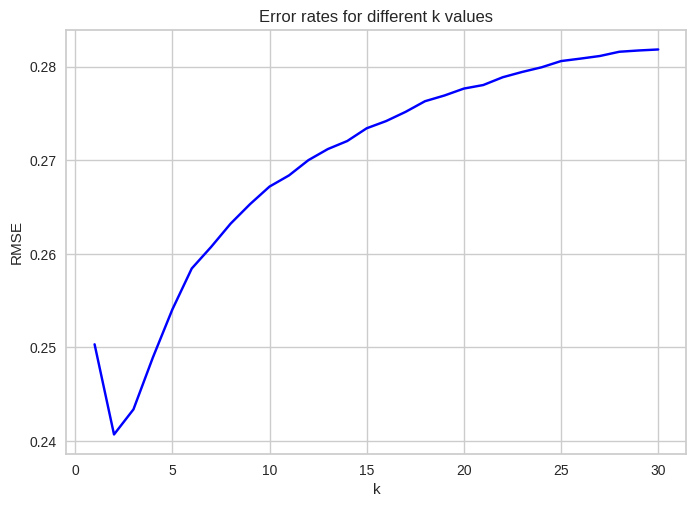

In [85]:
# Plotting k values against accuracy scores
plt.ylabel('RMSE')
plt.xlabel('k')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

### **Model comparison for KNN**


In [86]:
# Creating a KNN regressor object
k=2
knn = KNeighborsRegressor(k)

# Fitting the model to the training data
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=2)

In [87]:
# Predicting data
y_pred_best = knn.predict(X_test_scaled)

In [88]:
# Calculating performance metrics for the SECOND model
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_2 = r2_score(y_test, y_pred_best)
mae_2 = mean_absolute_error(y_test, y_pred_best)

In [89]:
# Print performance metrics for the SECOND model
print("Root Mean Squared Error: {:.3f}".format(rmse_2))
print("R Squared: {:.3f}".format(r2_2))
print("Absolute Squared Error: {:.3f}".format(mae_2))

Root Mean Squared Error: 0.241
R Squared: 0.692
Absolute Squared Error: 0.137


In [90]:
# Code to print performance metrics for the FIRST model
print("Root Mean Squared Error: {:.3f}".format(rmse_1))
print("R Squared: {:.3f}".format(r2_1))
print("Absolute Squared Error: {:.3f}".format(mae_1))

Root Mean Squared Error: 0.243
R Squared: 0.686
Absolute Squared Error: 0.151


From the above comparison we can see that the model performs better for k=2. Therefore, the model is optimised for k=2.

### **Random Forest Regressor**

In [91]:
# Creating the random forest regressor ensemble learner model
rf_model = RandomForestRegressor(n_estimators=200, random_state=2023)

# Training the model on the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=2023)

In [92]:
# Making predictions on the testing data
y_pred_rf = rf_model.predict(X_test_scaled)

In [93]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_rf})
inspection.head(10)

Actual  Predicted
11210     3.0   3.011567
2246      2.9   3.309500
29349     3.6   3.552500
31952     3.7   3.707500
34301     2.9   3.825250
27279     3.4   3.438083
13821     3.9   4.301500
12768     3.8   3.818000
39169     4.0   4.005500
28574     3.3   3.267766

In [94]:
# Calculating performance metrics for the Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [95]:
# Print performance metrics for the Random Forest model
print("Root Mean Squared Error: {:.3f}".format(rmse_rf))
print("R Squared: {:.3f}".format(r2_rf))
print("Absolute Squared Error: {:.3f}".format(mae_rf))

Root Mean Squared Error: 0.160
R Squared: 0.864
Absolute Squared Error: 0.087


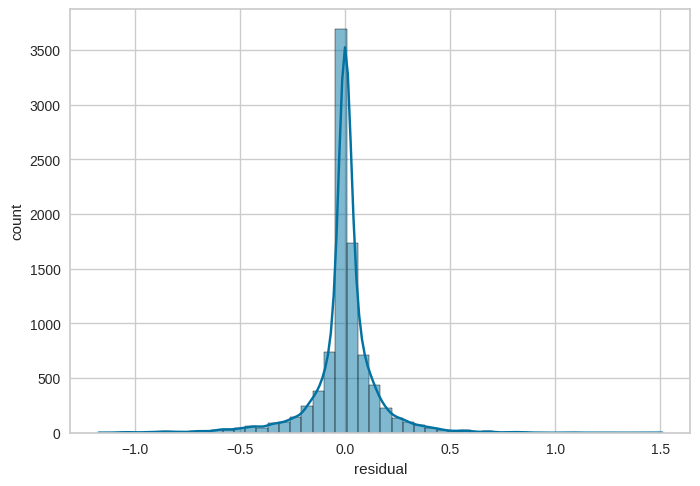

In [96]:
# Plotting residuals, i.e. the differences between the actual and predicted values.
sns.histplot(x=y_test-y_pred_rf, bins=50, kde=True)
plt.xlabel('residual')
plt.ylabel('count')
plt.show()

Looking at the performance of both the models, we see that Random Forest Regressor Model performs better with
* RMSE = 0.160
* R-squared = 0.864
* MAE = 0.087

### **k fold Cross Validation**

In [97]:
# Features to scale
features_to_scale = ['ave_cost_for_two', 'votes', 'ave_review_ranking' ]

# Features to keep
features_to_keep = ['rest_type_Cafe','rest_type_Casual Dining','rest_type_Casual Dining, Bar',	'rest_type_Delivery',	'rest_type_Quick Bites',
                 'rest_type_Takeaway, Delivery','listed_in_type_Cafes','listed_in_type_Delivery','listed_in_type_Desserts','listed_in_type_Dine-out',
                 'listed_in_type_Drinks & nightlife','listed_in_type_Pubs and bars','online_order_Yes','book_table_Yes']


# Normalize the features using StandardScaler
scaler = StandardScaler()

# Fit and transform the features to scale on the training data
X_scaled_values = scaler.fit_transform(X[features_to_scale])


# Create DataFrames from the scaled values
X_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_scaled = pd.concat([X_scaled, X[features_to_keep].reset_index(drop=True)], axis=1)

In [98]:
# Create a KFold object for 10-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2023)

#### **KNN Model**

In [99]:
# cross-validation on the KNN model
neg_mse_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='r2')

# Compute the root mean squared error (RMSE) from the negative mean squared error scores
rmse_scores = np.sqrt(-neg_mse_scores)

# Compute the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Compute the 95% confidence interval for the mean RMSE
ci_rmse = 1.96 * (std_rmse / np.sqrt(len(rmse_scores)))

# Compute the mean and standard deviation of r2
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Compute the 95% confidence interval for the mean r2
ci_r2 = 1.96 * (std_r2 / np.sqrt(len(r2_scores)))


# Print the results
print("Average RMSE: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_rmse, mean_rmse - ci_rmse, mean_rmse + ci_rmse))
print("Average R2: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_r2, mean_r2 - ci_r2, mean_r2 + ci_r2))

Average RMSE: 0.22 (95% CI: 0.22, 0.23)
Average R2: 0.73 (95% CI: 0.72, 0.74)


#### **Random Forest Regressor Model**

In [100]:
# cross-validation on the RF model
neg_mse_scores = cross_val_score(rf_model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='r2')

# Compute the root mean squared error (RMSE) from the negative mean squared error scores
rmse_scores = np.sqrt(-neg_mse_scores)

# Compute the mean and standard deviation of the RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

# Compute the 95% confidence interval for the mean RMSE
ci_rmse = 1.96 * (std_rmse / np.sqrt(len(rmse_scores)))

# Compute the mean and standard deviation of r2
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Compute the 95% confidence interval for the mean r2
ci_r2 = 1.96 * (std_r2 / np.sqrt(len(r2_scores)))


# Print the results
print("Average RMSE: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_rmse, mean_rmse - ci_rmse, mean_rmse + ci_rmse))
print("Average R2: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_r2, mean_r2 - ci_r2, mean_r2 + ci_r2))

Average RMSE: 0.14 (95% CI: 0.14, 0.15)
Average R2: 0.73 (95% CI: 0.72, 0.74)


Performing Cross Validation on both the models we can observe that Random Forest Regressor performs slightly better with lesser RMSE value.

**Therefore we can conclude that the best model for prediction is Random Forest Regressor Model for our dataset.**

### **K Means Clustering**

**Feature Selection**

In [101]:
feature_importances = rf_model.feature_importances_

feature_ranking = np.argsort(feature_importances)[::-1]

# Select the top 6 features
top_features = X_scaled.iloc[:, feature_ranking[:6]]

In [102]:
# Fitting K-means clustering model with an initially selected number of clusters
k=2
kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2023)

#Write code to fit kmeans with X_scaled
kmeans.fit(top_features)

KMeans(n_clusters=2, n_init='auto', random_state=2023)

## **Performance Evaluation and Optimisation**


In [103]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(top_features, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(top_features, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 79305.968
Davies Bouldin index: 1.204
Silhouette score: 0.442


#### **Optimising K value**

**elbow method based on the SSE (WCSS) score**

In [104]:
sse_scores = []
best_k=2
best_sse_score= 1651971826.780
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(top_features)
  sse_score_i=kmeans.inertia_
  sse_scores.append(sse_score_i)
  if best_sse_score > sse_score_i:
    best_k = i
    best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  11514.292


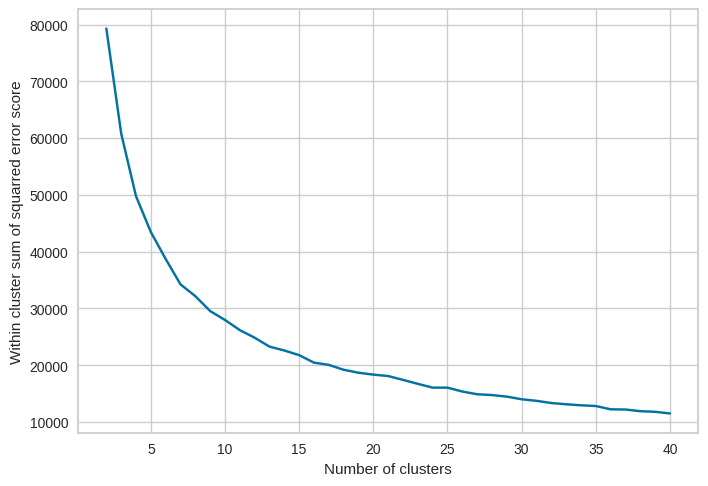

In [105]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

**We can observe that as the value of k increases, wcss value decreases. Therefore wcss alone is not a good metric.**

**elbow method based on the silhoutte score**

In [106]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=4
best_sil_score=0
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(top_features)
  sil_score_i=silhouette_score(top_features, kmeans.labels_)
  sil_scores.append(sil_score_i)
  if best_sil_score < sil_score_i:
    best_k = i
    best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  2
Best silhouette score:  0.465


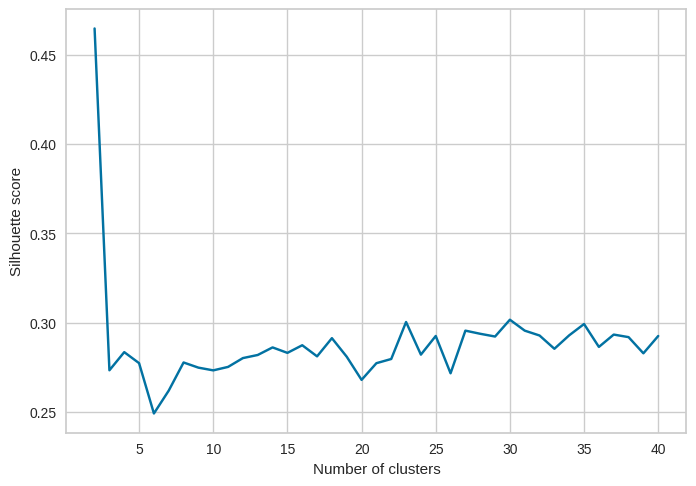

In [107]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

**Observing both metric**

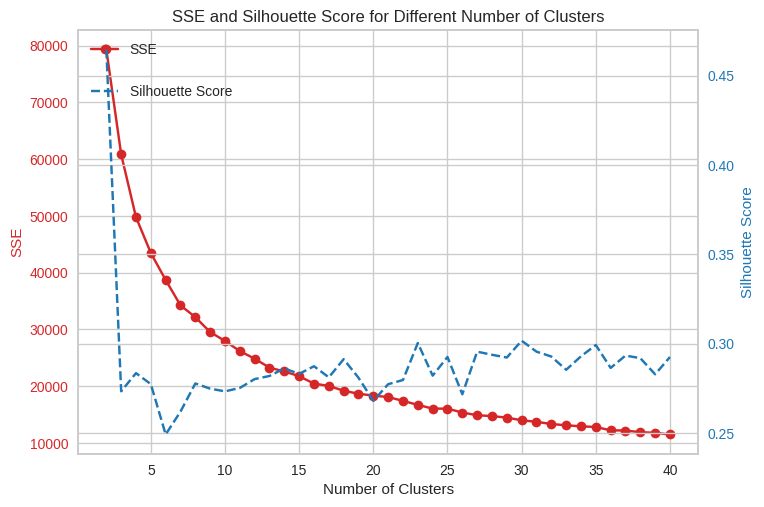

In [108]:
# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()

#### **Model Selection**

In [109]:
# Setting the number of clusters
n_clusters = 2

# Fitting K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=2023)
cluster_labels = kmeans.fit_predict(top_features)

# Adding cluster labels to original dataset
df['Cluster'] = kmeans.labels_

In [110]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(top_features, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(top_features, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 79305.968
Davies Bouldin index: 1.204
Silhouette score: 0.442


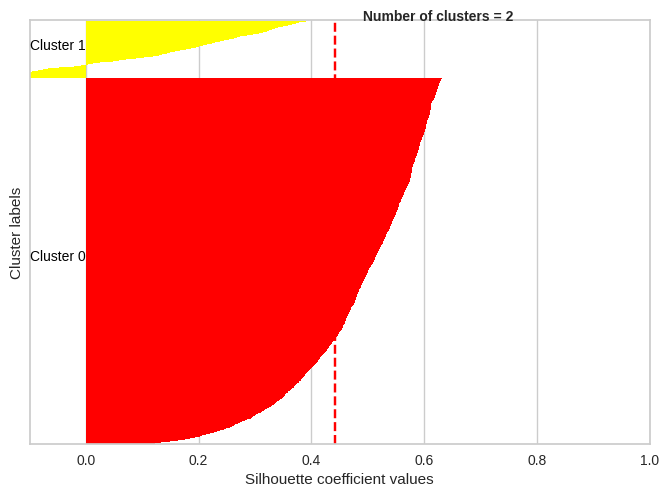

In [111]:
# Compute silhouette scores
silhouette_avg = silhouette_score(top_features, cluster_labels)
sample_silhouette_values = silhouette_samples(top_features, cluster_labels)

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.autumn

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_scaled) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

In [112]:
cluster_count=df.Cluster.value_counts()
cluster_count

0    26554
1     4145
Name: Cluster, dtype: int64

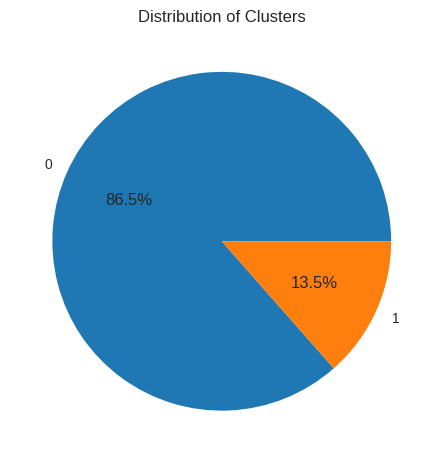

In [113]:
# Pie chart

# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()

colours = sns.color_palette("tab10", n_colors=len(cluster_count))

plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors= colours)
plt.title('Distribution of Clusters')
plt.show()

In [114]:
top_features

votes  ave_review_ranking  ave_cost_for_two  online_order_Yes  \
0     -0.417349            1.357845          0.437658                 0   
1     -0.394873            1.065912         -0.442717                 1   
2     -0.409857            0.482045         -1.029634                 1   
3      0.387277            1.416232          1.904949                 1   
4     -0.336437           -0.685689         -0.882905                 1   
...         ...                 ...               ...               ...   
30694 -0.137153           -0.685689          1.318033                 0   
30695 -0.402365           -0.154901         -0.149259                 1   
30696 -0.402365           -0.154901         -0.736176                 0   
30697 -0.194091           -0.101822         -0.149259                 1   
30698 -0.192593           -0.388141         -0.589447                 1   

       rest_type_Casual Dining  rest_type_Cafe  
0                            0               1  
1                            0               0  
2                            0               0  
3                            1               0  
4                            0               1  
...                        ...             ...  
30694                        0               0  
30695                        0               0  
30696                        0               0  
30697                        0               0  
30698                        0               0  

[30699 rows x 6 columns]

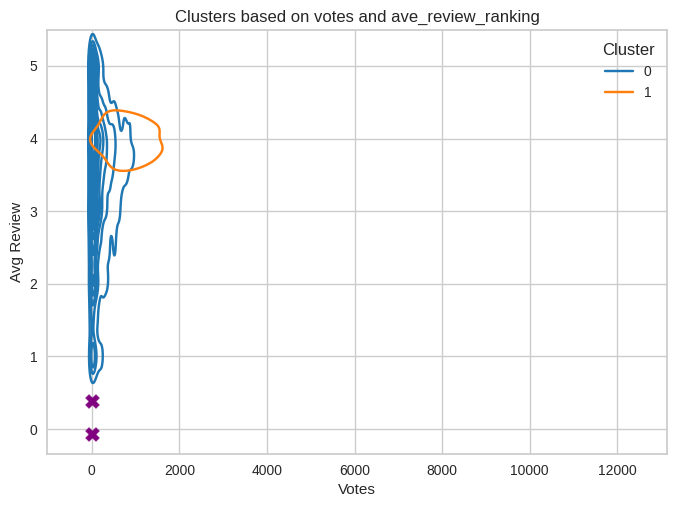

In [115]:
# Getting centroids from the kmeans model
centroids = kmeans.cluster_centers_[:, :2]

# Reverse the scaling on the centroids
centroids_original = (centroids)

# Create the KDE plot for the records
sns.kdeplot(data=df, x='votes', y='ave_review_ranking', hue='Cluster', palette='tab10', legend='full')

votes_centroids = centroids[:, 0]  # 0 is the index for 'votes'
avg_rev_centroids = centroids[:, 1]          # 1 is the index for 'ave_review_ranking'

# Overlay the centroids on the same plot
plt.scatter(votes_centroids, avg_rev_centroids, c='purple', marker='X', s=100, label='Centroids')

# Setting the title and labels
plt.title('Clusters based on votes and ave_review_ranking')
plt.xlabel('Votes')
plt.ylabel('Avg Review')
#plt.legend(loc='upper right')

plt.show()
